In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Mixture = np.load('2017-09-25NMF_Ncomps16Mixture.npy')

In [3]:
Mixture.shape

(16, 2232744)

In [4]:
cluster_assignments = np.load('2017-10-26clusterassignments36.npy')

In [5]:
cluster_assignments.shape

(2232744,)

In [6]:
NormedMixture =   Mixture / np.sum(Mixture, axis=0)


In [7]:
from sklearn.cluster import KMeans


In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score


In [9]:
def define_colorsA(Ncomps, mode='newSasha'):
    if (mode=='newSasha'):
        Comp_colors = ['#A6CEE3','#1f78b4','#b2df8a','#33a02c','#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#ffd700', '#AAAAAA', '#C52892', '#00bbbb']
    elif (mode=='Sasha'):
        Comp_colors = ['red', 'tan', 'lime','blue','m','k','c', 'coral', 'indigo','darkgreen','orange','grey','gold', 'lightskyblue', 'peru', 'olive']
    else:
        Comp_colors = ["#A6CEE3", "#438EC0", "#63A8A0", "#98D277", "#3BA432", "#B89B74", "#F16667", "#E62F27", "#F9A963", "#FE982C", "#ED8F47", "#C3AAD2", "#7D54A5","#B9A499", "#EAD27A" ,"#B15928"]
    if (Ncomps>16):
        np.random.seed(666)
        from matplotlib import colors as mcolors
        colornames = list(mcolors.CSS4_COLORS.keys())
        count = 16
        while (count < Ncomps):
            newcolor = colornames[np.random.randint(0,len(colornames))]
            trialcount = 0
            while ((newcolor in Comp_colors) and (trialcount < 100)):
                newcolor = colornames[np.random.randint(0,len(colornames))]
                trialcount+=1
            Comp_colors.append(newcolor)
            count+=1
    return Comp_colors
    

In [10]:
from OONMFhelpers import *

/Users/amuratov/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [11]:
today = get_today()

def make_stacked_bar_plot(Ncomps, Nrelevant, BarMatrix, bargraph_out, names = [], plotClusterMode=False, barsortorder=[], clusterTopLabels=[], colormode='newSasha', plot_title=''):
    if len(barsortorder)<1:
        barsortorder = np.arange(Nrelevant)
        #print('inventing barsortorder')
    if len(names) < 1:
        #print('inventing names')
        names = [str(i) for i in range(Nrelevant)]
        names = np.array(names)
    ttt = np.arange(Nrelevant)
    start = 0
    end = Nrelevant
    ground_pSample = ttt*0
    Comp_colors = define_colorsA(Ncomps, mode=colormode)
    plt.clf()
    plt.figure(figsize=(150,40))
    plt.bar(ttt[start:end], BarMatrix[0,start:end][barsortorder],  color=Comp_colors[0], bottom=ground_pSample[start:end], alpha=1.0)
    ground_pSample = BarMatrix[0,start:end][barsortorder]
    for i in range(1,Ncomps):
        plt.bar(ttt[start:end],BarMatrix[i,start:end][barsortorder], bottom = ground_pSample, color=Comp_colors[i], alpha=1.0)
        ground_pSample = np.sum(BarMatrix[0: i+1,start:end], axis=0)[barsortorder]
    increase_axis_fontsize()
    plt.ylabel('sum of signal in matrix',fontsize=70)
    if (len(plot_title) > 0):
        plt.title(plot_title,fontsize=70)
    #plt.title('Full Sample',fontsize=70)
    samplenamesize = 11
    samplenamesize = (1/Nrelevant)**0.5 * 300
    #thebottom = 0.15
    thebottom = min([(1/Nrelevant)**0.3 * 1.2, 0.3])
    if(plotClusterMode):
        plt.xticks(ttt, ttt.astype(str), rotation='vertical', fontsize=samplenamesize)
        if len(clusterTopLabels) > 0:
            ax = plt.gca()
            ax2 = ax.twiny()
            ax2.set_xticks(ttt)
            ax2.set_xticklabels(clusterTopLabels.astype(str), rotation=90, fontsize=samplenamesize)
            #ax.xaxis.tick_top()
            #plt.xticks(ttt, clusterTopLabels.astype(str), rotation='vertical', fontsize=samplenamesize)
    else:
        plt.xticks(ttt, names[barsortorder], rotation='vertical', fontsize=samplenamesize)	
    plot_margin = 5
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=thebottom)
    plt.savefig(bargraph_out)
    plt.close()	
    

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [13]:

for current_prototype in [j for j in range(36)]:
    print ('doing prototype',current_prototype+1)
    cut = cluster_assignments==current_prototype
    X =  NormedMixture.T[cut]
    
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
    cut = cluster_assignments==current_prototype

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)



        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        #print('done clustering', n_clusters)
        cluster_labels = (clusterer.fit(X)).labels_
        #print(cluster_labels)
        np.random.seed(666)
        desiredX = np.random.choice(X.shape[0], 5000,replace=False)
        Xcut = np.in1d(np.arange(X.shape[0]), desiredX)
        for i in range(n_clusters):
            silcut = cluster_labels[Xcut] == i
            #print('basiscut length ',len(silcut[silcut]))

            if len(silcut[silcut] ) > 40:
                chosenNum = 40
            else:
                chosenNum = len(silcut[silcut])
            possibleDHS = np.arange(len(silcut))[silcut]
            desiredDHS = np.random.choice(possibleDHS, chosenNum,replace=False)
            VisualDHScut = np.in1d(np.arange(len(silcut)), desiredDHS)
            winningcomp = np.argmax(np.sum(X[Xcut][VisualDHScut], axis=0))
            desired_order = np.argsort(-X[Xcut][VisualDHScut][:,winningcomp])    
            #desired_order = np.argsort(-NormedMixture.T[VisualDHScut][:,i])
            #UNnormedbarsortorder = get_barsortorder(Mixture.T[mixturecut])
            make_stacked_bar_plot(16, chosenNum, X[Xcut][VisualDHScut][desired_order].T, today+'p'+str(current_prototype+1)+'NormedDHSc_set_of'+str(n_clusters)+'N'+str(i+1)+'.pdf', plot_title='N'+str(i+1)+' length '+str(len(silcut[silcut])))

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        #silhouette_avg = silhouette_score(X, cluster_labels, sample_size=1000)
        silhouette_avg = silhouette_score(X[Xcut], cluster_labels[Xcut])
        #print("For n_clusters =", n_clusters,
        #      "The average silhouette_score is :", silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X[Xcut], cluster_labels[Xcut])

        labels_of_sils = []

        fig = plt.figure(figsize=(18,7))
        ax1=plt.gca()

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, 5000 + (n_clusters + 1) * 10])
        y_lower = 10

        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels[Xcut] == i]

            ith_cluster_silhouette_values.sort()
            labels_of_sils.append(np.median(ith_cluster_silhouette_values))

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        labels_of_sils = np.array(labels_of_sils)
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.legend(labels_of_sils.astype(str))
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.axvline(x=0.5, color="blue", linestyle=":")

        # 2nd Plot showing the actual clusters formed
        '''
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        '''
        plt.savefig(today+'prototype'+str(current_prototype+1)+'NC'+str(n_clusters)+'sil.pdf')
        plt.close()


doing prototype 1
doing prototype 2
doing prototype 3
doing prototype 4
doing prototype 5
doing prototype 6
doing prototype 7
doing prototype 8
doing prototype 9
doing prototype 10
doing prototype 11
doing prototype 12
doing prototype 13
doing prototype 14
doing prototype 15
doing prototype 16
doing prototype 17
doing prototype 18
doing prototype 19
doing prototype 20
doing prototype 21
doing prototype 22
doing prototype 23
doing prototype 24
doing prototype 25
doing prototype 26
doing prototype 27
doing prototype 28
doing prototype 29
doing prototype 30
doing prototype 31
doing prototype 32
doing prototype 33
doing prototype 34
doing prototype 35
doing prototype 36


In [32]:
list_of_sils = []
for current_prototype in [j for j in range(36)]:
    prot_sils = []
    print ('doing prototype',current_prototype+1)
    cut = cluster_assignments==current_prototype
    X =  NormedMixture.T[cut]
    
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10, 11, 12]
    cut = cluster_assignments==current_prototype

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)



        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        #print('done clustering', n_clusters)
        cluster_labels = (clusterer.fit(X)).labels_
        #print(cluster_labels)
        np.random.seed(666)
        desiredX = np.random.choice(X.shape[0], 5000,replace=False)
        Xcut = np.in1d(np.arange(X.shape[0]), desiredX)
        for i in range(n_clusters):
            silcut = cluster_labels[Xcut] == i
            #print('basiscut length ',len(silcut[silcut]))

            if len(silcut[silcut] ) > 40:
                chosenNum = 40
            else:
                chosenNum = len(silcut[silcut])
            possibleDHS = np.arange(len(silcut))[silcut]
            desiredDHS = np.random.choice(possibleDHS, chosenNum,replace=False)
            VisualDHScut = np.in1d(np.arange(len(silcut)), desiredDHS)
            winningcomp = np.argmax(np.sum(X[Xcut][VisualDHScut], axis=0))
            desired_order = np.argsort(-X[Xcut][VisualDHScut][:,winningcomp])    
            #desired_order = np.argsort(-NormedMixture.T[VisualDHScut][:,i])
            #UNnormedbarsortorder = get_barsortorder(Mixture.T[mixturecut])
            make_stacked_bar_plot(16, chosenNum, X[Xcut][VisualDHScut][desired_order].T, today+'p'+str(current_prototype+1)+'NormedDHSc_set_of'+str(n_clusters)+'N'+str(i+1)+'.pdf', plot_title='N'+str(i+1)+' length '+str(len(silcut[silcut])))

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        #silhouette_avg = silhouette_score(X, cluster_labels, sample_size=1000)
        silhouette_avg = silhouette_score(X[Xcut], cluster_labels[Xcut])
        prot_sils.append(silhouette_avg)
        #print("For n_clusters =", n_clusters,
        #      "The average silhouette_score is :", silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X[Xcut], cluster_labels[Xcut])

        labels_of_sils = []

        fig = plt.figure(figsize=(18,7))
        ax1=plt.gca()

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, 5000 + (n_clusters + 1) * 10])
        y_lower = 10

        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels[Xcut] == i]

            ith_cluster_silhouette_values.sort()
            labels_of_sils.append(np.median(ith_cluster_silhouette_values))

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        labels_of_sils = np.array(labels_of_sils)
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.legend(labels_of_sils.astype(str))
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.axvline(x=0.5, color="blue", linestyle=":")

        # 2nd Plot showing the actual clusters formed
        '''
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        '''
        plt.savefig(today+'prototype'+str(current_prototype+1)+'NC'+str(n_clusters)+'sil.pdf')
        plt.close()
    list_of_sils.append(prot_sils)


doing prototype 1
doing prototype 2
doing prototype 3
doing prototype 4
doing prototype 5
doing prototype 6
doing prototype 7
doing prototype 8
doing prototype 9
doing prototype 10
doing prototype 11
doing prototype 12
doing prototype 13
doing prototype 14
doing prototype 15
doing prototype 16
doing prototype 17
doing prototype 18
doing prototype 19
doing prototype 20
doing prototype 21
doing prototype 22
doing prototype 23
doing prototype 24
doing prototype 25
doing prototype 26
doing prototype 27
doing prototype 28
doing prototype 29
doing prototype 30
doing prototype 31
doing prototype 32
doing prototype 33
doing prototype 34
doing prototype 35
doing prototype 36


In [41]:
list_of_sils.shape

(396, 11)

In [42]:
396/36

11.0

In [46]:
new_list_of_sils = []
list_of_inds = [11*j for j in range(36)]
for ind in list_of_inds:
    new_list_of_sils.append(list_of_sils[ind])

In [47]:
new_list_of_sils = np.array(new_list_of_sils)

In [48]:
np.argmax(new_list_of_sils, axis=1)+2

array([12, 12, 12, 12, 12,  9, 10, 11,  2,  4, 12, 10,  5, 12, 12,  6, 12,
       11, 12, 12, 12, 12,  7, 11,  3,  5, 12, 12,  7, 12, 12, 12,  2, 12,
       11, 12])

In [49]:
new_list_of_sils.shape

(36, 11)

In [50]:
np.gradient(new_list_of_sils, axis=1)

array([[ -2.78847130e-02,  -4.07035389e-02,   9.79144302e-03,
          2.04411616e-02,  -7.92794489e-03,   8.28177411e-03,
          4.81218790e-03,   8.31763857e-03,   3.99483470e-03,
          3.72520793e-03,   6.66815822e-03],
       [ -1.36919829e-02,   1.36000168e-03,   1.60342658e-02,
          1.62905184e-02,   1.52755334e-02,   1.13128687e-02,
          7.76128836e-03,   5.36242981e-03,   4.57422291e-03,
          5.72641773e-03,   6.50583484e-03],
       [ -4.92205452e-03,   3.14134057e-02,   4.82317383e-02,
          1.65910126e-02,   1.02071219e-02,   1.57508876e-02,
          1.20882707e-02,   5.04133602e-03,   2.25681693e-03,
          8.00085999e-03,   1.29491628e-02],
       [  1.66046189e-02,  -4.15716553e-02,  -4.26136481e-02,
         -4.34260244e-03,   8.17649084e-03,   2.26936814e-02,
          2.76289412e-02,   2.73731707e-02,   8.11588032e-03,
          7.34817392e-03,   3.78158921e-03],
       [  2.19710840e-02,   1.97404127e-02,   1.19128079e-02,
          6.63

In [57]:
np.mean(new_list_of_sils,axis=0)

array([ 0.32350312,  0.34307319,  0.35764896,  0.37034891,  0.37297047,
        0.38311573,  0.38805551,  0.40064236,  0.40579086,  0.40946823,
        0.41622737])

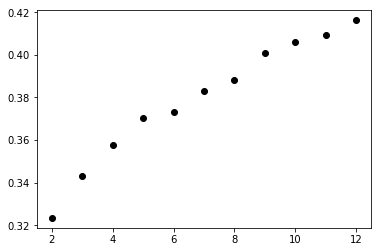

In [58]:
plt.clf()
plt.plot(np.arange(2, 13, 1), np.mean(new_list_of_sils,axis=0), 'ok' )
plt.show()

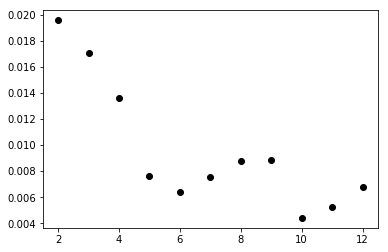

In [59]:
plt.clf()
plt.plot(np.arange(2, 13, 1), np.gradient(np.mean(new_list_of_sils,axis=0)), 'ok' )
plt.show()

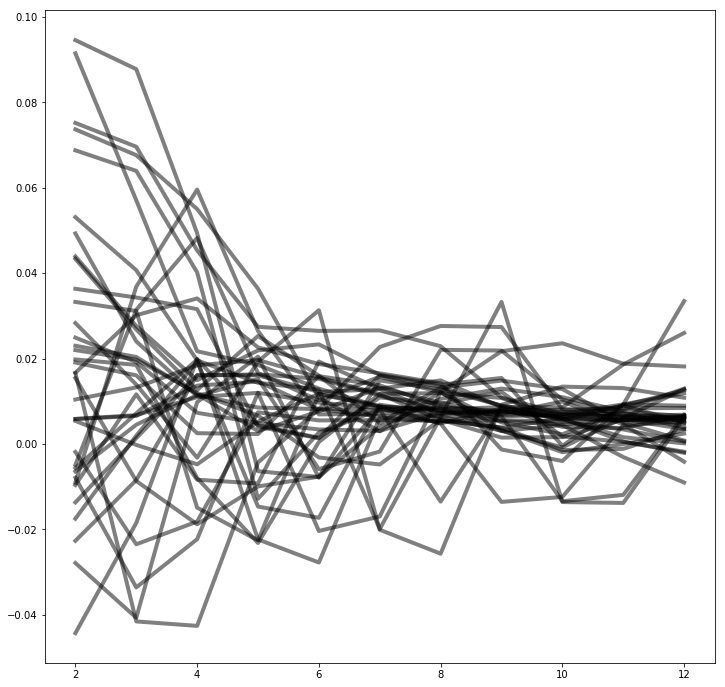

In [60]:
plt.clf()
plt.figure(figsize=(12,12))
for line in np.gradient(new_list_of_sils, axis=1):
    plt.plot(np.arange(2, 13, 1), line, '-k', alpha=0.5, lw=4)
plt.show()

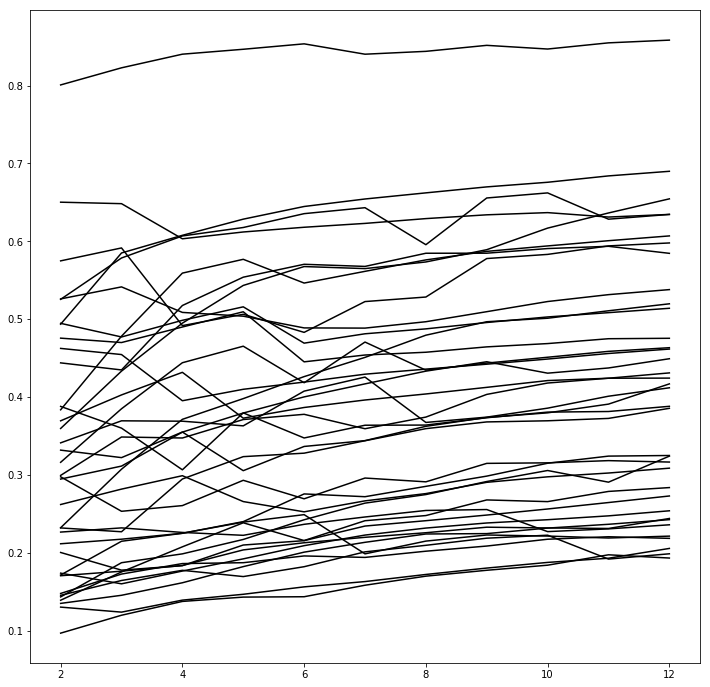

In [54]:
plt.clf()
plt.figure(figsize=(12,12))
for line in new_list_of_sils:
    plt.plot(np.arange(2, 13, 1), line, '-k')
plt.show()

In [34]:
list_of_sils = np.array(list_of_sils)

In [37]:
np.argmax(list_of_sils, axis=1)+2

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12

In [40]:
np.gradient(list_of_sils,axis=1)

array([[-0.02788471, -0.04070354,  0.00979144, ...,  0.00399483,
         0.00372521,  0.00666816],
       [-0.02788471, -0.04070354,  0.00979144, ...,  0.00399483,
         0.00372521,  0.00666816],
       [-0.02788471, -0.04070354,  0.00979144, ...,  0.00399483,
         0.00372521,  0.00666816],
       ..., 
       [ 0.07518214,  0.06961124,  0.04532465, ...,  0.00703749,
         0.00927062,  0.00895535],
       [ 0.07518214,  0.06961124,  0.04532465, ...,  0.00703749,
         0.00927062,  0.00895535],
       [ 0.07518214,  0.06961124,  0.04532465, ...,  0.00703749,
         0.00927062,  0.00895535]])

In [15]:
NormedMixture

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.00582582, ...,  0.02835827,
         0.02835827,  0.02835827],
       [ 0.00639961,  0.        ,  0.11418054, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [17]:
np.min(NormedMixture, axis=0).shape

(2232744,)

In [18]:
mins = np.min(NormedMixture, axis=0)

In [19]:
len(mins[mins>0])

23669

In [31]:
Mixture.shape

(16, 2232744)

In [64]:
today = get_today()

In [65]:
today

'2017-11-06'

In [67]:
today = today[0:8]+'666'

In [68]:
today

'2017-11-666'

In [69]:
list_of_sils = []
for current_prototype in [j for j in range(36)]:
    prot_sils = []
    print ('doing prototype',current_prototype+1)
    cut = cluster_assignments==current_prototype
    X =  NormedMixture.T[cut]
    
    range_n_clusters = [2, 3, 4, 5, 6]
    cut = cluster_assignments==current_prototype

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)



        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        #print('done clustering', n_clusters)
        cluster_labels = (clusterer.fit(X)).labels_
        #print(cluster_labels)
        np.random.seed(666)
        desiredX = np.random.choice(X.shape[0], 5000,replace=False)
        Xcut = np.in1d(np.arange(X.shape[0]), desiredX)
        for i in range(n_clusters):
            silcut = cluster_labels[Xcut] == i
            #print('basiscut length ',len(silcut[silcut]))

            if len(silcut[silcut] ) > 40:
                chosenNum = 40
            else:
                chosenNum = len(silcut[silcut])
            possibleDHS = np.arange(len(silcut))[silcut]
            desiredDHS = np.random.choice(possibleDHS, chosenNum,replace=False)
            VisualDHScut = np.in1d(np.arange(len(silcut)), desiredDHS)
            winningcomp = np.argmax(np.sum(X[Xcut][VisualDHScut], axis=0))
            desired_order = np.argsort(-X[Xcut][VisualDHScut][:,winningcomp])    
            #desired_order = np.argsort(-NormedMixture.T[VisualDHScut][:,i])
            #UNnormedbarsortorder = get_barsortorder(Mixture.T[mixturecut])
            make_stacked_bar_plot(16, chosenNum, X[Xcut][VisualDHScut][desired_order].T, today+'p'+str(current_prototype+1)+'NormedDHSc_set_of'+str(n_clusters)+'N'+str(i+1)+'.pdf', plot_title='N'+str(i+1)+' length '+str(len(silcut[silcut])))

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        #silhouette_avg = silhouette_score(X, cluster_labels, sample_size=1000)
        silhouette_avg = silhouette_score(X[Xcut], cluster_labels[Xcut])
        prot_sils.append(silhouette_avg)
        #print("For n_clusters =", n_clusters,
        #      "The average silhouette_score is :", silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X[Xcut], cluster_labels[Xcut])

        labels_of_sils = []

        fig = plt.figure(figsize=(18,7))
        ax1=plt.gca()

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, 5000 + (n_clusters + 1) * 10])
        y_lower = 10

        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels[Xcut] == i]

            ith_cluster_silhouette_values.sort()
            labels_of_sils.append(np.median(ith_cluster_silhouette_values))

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        labels_of_sils = np.array(labels_of_sils)
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.legend(labels_of_sils.astype(str))
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.axvline(x=0.5, color="blue", linestyle=":")

        # 2nd Plot showing the actual clusters formed
        '''
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        '''
        plt.savefig(today+'prototype'+str(current_prototype+1)+'NC'+str(n_clusters)+'sil.pdf')
        plt.close()
    list_of_sils.append(prot_sils)


doing prototype 1
doing prototype 2
doing prototype 3
doing prototype 4
doing prototype 5
doing prototype 6
doing prototype 7
doing prototype 8
doing prototype 9
doing prototype 10
doing prototype 11
doing prototype 12
doing prototype 13
doing prototype 14
doing prototype 15
doing prototype 16
doing prototype 17
doing prototype 18
doing prototype 19
doing prototype 20
doing prototype 21
doing prototype 22
doing prototype 23
doing prototype 24
doing prototype 25
doing prototype 26
doing prototype 27
doing prototype 28
doing prototype 29
doing prototype 30
doing prototype 31
doing prototype 32
doing prototype 33
doing prototype 34
doing prototype 35
doing prototype 36


In [70]:
list_of_sils = np.array(list_of_sils)

In [74]:
np.argmax(list_of_sils, axis=1)+2

array([2, 6, 6, 3, 6, 6, 6, 6, 2, 4, 4, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 3, 5, 6, 6, 5, 4, 5, 6, 2, 6, 2, 6])

In [75]:
np.sum(np.argmax(list_of_sils, axis=1)+2)

183

# so maybe 183 new clusters based on subclusterings

In [80]:
today = get_today()

In [81]:
today

'2017-11-07'

In [77]:
Ncs_per_prototype = np.argmax(list_of_sils, axis=1)+2

In [78]:
Ncs_per_prototype

array([2, 6, 6, 3, 6, 6, 6, 6, 2, 4, 4, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 3, 5, 6, 6, 5, 4, 5, 6, 2, 6, 2, 6])

In [169]:
subcluster_lists = []
subcluster_center_list = []
doplots= False
for current_prototype in [j for j in range(36)]:
    prot_sils = []
    print ('doing prototype',current_prototype+1)
    cut = cluster_assignments==current_prototype
    X =  NormedMixture.T[cut]
    n_clusters = Ncs_per_prototype[current_prototype]
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #print('done clustering', n_clusters)
    clusterfitobject = clusterer.fit(X)
    cluster_labels = clusterfitobject.labels_
    cluster_centers = clusterfitobject.cluster_centers_
    subcluster_lists.append(cluster_labels)
    #print(cluster_labels)
    np.random.seed(666)
    desiredX = np.random.choice(X.shape[0], 5000,replace=False)
    Xcut = np.in1d(np.arange(X.shape[0]), desiredX)
    for i in range(n_clusters):
        silcut = cluster_labels[Xcut] == i
        bilcut = cluster_labels == i
        #print('basiscut length ',len(silcut[silcut]))

        if len(silcut[silcut] ) > 40:
            chosenNum = 40
        else:
            chosenNum = len(silcut[silcut])
        possibleDHS = np.arange(len(silcut))[silcut]
        desiredDHS = np.random.choice(possibleDHS, chosenNum,replace=False)
        VisualDHScut = np.in1d(np.arange(len(silcut)), desiredDHS)
        winningcomp = np.argmax(np.sum(X[Xcut][VisualDHScut], axis=0))
        desired_order = np.argsort(-X[Xcut][VisualDHScut][:,winningcomp])    
        #desired_order = np.argsort(-NormedMixture.T[VisualDHScut][:,i])
        #UNnormedbarsortorder = get_barsortorder(Mixture.T[mixturecut])
        
        if (doplots):
            make_stacked_bar_plot(16, chosenNum, X[Xcut][VisualDHScut][desired_order].T, today+'p'+str(current_prototype+1)+'optimizedNormedDHSc_set_of'+str(n_clusters)+'N'+str(i+1)+'.pdf', plot_title='N'+str(i+1)+' length '+str(len(silcut[silcut])))
        subcluster_center_line = [current_prototype+1, i+1, len(bilcut[bilcut])] +  cluster_centers[i].tolist()
        subcluster_center_list.append(subcluster_center_line)


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    #silhouette_avg = silhouette_score(X, cluster_labels, sample_size=1000)
    silhouette_avg = silhouette_score(X[Xcut], cluster_labels[Xcut])
    prot_sils.append(silhouette_avg)
    #print("For n_clusters =", n_clusters,
    #      "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X[Xcut], cluster_labels[Xcut])

    labels_of_sils = []

    if (doplots):
        fig = plt.figure(figsize=(18,7))
        ax1=plt.gca()

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, 5000 + (n_clusters + 1) * 10])
        y_lower = 10


        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels[Xcut] == i]

            ith_cluster_silhouette_values.sort()
            labels_of_sils.append(np.median(ith_cluster_silhouette_values))

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        labels_of_sils = np.array(labels_of_sils)
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.legend(labels_of_sils.astype(str))
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.axvline(x=0.5, color="blue", linestyle=":")

        # 2nd Plot showing the actual clusters formed
        '''
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        '''
        plt.savefig(today+'optimized_prototype'+str(current_prototype+1)+'NC'+str(n_clusters)+'sil.pdf')
        plt.close()

doing prototype 1
doing prototype 2
doing prototype 3
doing prototype 4
doing prototype 5
doing prototype 6
doing prototype 7
doing prototype 8
doing prototype 9
doing prototype 10
doing prototype 11
doing prototype 12
doing prototype 13
doing prototype 14
doing prototype 15
doing prototype 16
doing prototype 17
doing prototype 18
doing prototype 19
doing prototype 20
doing prototype 21
doing prototype 22
doing prototype 23
doing prototype 24
doing prototype 25
doing prototype 26
doing prototype 27
doing prototype 28
doing prototype 29
doing prototype 30
doing prototype 31
doing prototype 32
doing prototype 33
doing prototype 34
doing prototype 35
doing prototype 36


In [138]:
subcluster_lists_np = np.array(subcluster_lists)

In [139]:
subcluster_lists_np

array([array([0, 0, 0, ..., 1, 0, 0], dtype=int32),
       array([0, 1, 1, ..., 4, 4, 4], dtype=int32),
       array([2, 1, 0, ..., 5, 0, 5], dtype=int32),
       array([0, 0, 0, ..., 0, 0, 1], dtype=int32),
       array([0, 0, 0, ..., 0, 0, 3], dtype=int32),
       array([2, 4, 4, ..., 1, 5, 2], dtype=int32),
       array([2, 3, 1, ..., 1, 1, 1], dtype=int32),
       array([2, 1, 0, ..., 4, 2, 2], dtype=int32),
       array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
       array([1, 1, 0, ..., 0, 0, 1], dtype=int32),
       array([2, 1, 1, ..., 3, 3, 3], dtype=int32),
       array([3, 3, 1, ..., 3, 0, 1], dtype=int32),
       array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
       array([4, 1, 1, ..., 2, 2, 1], dtype=int32),
       array([4, 1, 4, ..., 4, 2, 2], dtype=int32),
       array([0, 0, 3, ..., 0, 0, 3], dtype=int32),
       array([5, 5, 5, ..., 4, 5, 4], dtype=int32),
       array([2, 3, 5, ..., 2, 4, 2], dtype=int32),
       array([3, 3, 1, ..., 1, 1, 1], dtype=int32),
       array

In [140]:
subcluster_lists_np = np.array([])

In [141]:
subcluster_lists_np = np.ones(len(cluster_assignments)) * -1
print (len(subcluster_lists_np[subcluster_lists_np<0]))
for i, thearray in enumerate(subcluster_lists):
    cut = cluster_assignments==i
    subcluster_lists_np[cut] = thearray
    print (len(subcluster_lists_np[subcluster_lists_np<0]))
 

2232744
2192492
2132282
2032917
1915037
1811964
1751469
1578471
1531866
1482273
1415856
1386098
1298710
1254767
1193971
1126702
1044452
999705
954759
871678
829849
750767
716587
691733
649598
606030
577000
528325
471043
449885
399421
298408
285246
164444
97294
64546
0


In [142]:
subcluster_lists_np

array([ 0.,  0.,  3., ...,  1.,  1.,  1.])

In [143]:
np.bincount(subcluster_lists_np.astype(int))

array([668782, 501653, 309283, 319679, 242329, 191018])

In [144]:
subcluster_lists_np.shape

(2232744,)

In [145]:
dir(subcluster_lists_np)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '_

In [146]:
cluster_assignments.shape

(2232744,)

In [147]:
np.array([cluster_assignments, subcluster_lists_np]).T

array([[  3.,   0.],
       [ 32.,   0.],
       [ 11.,   3.],
       ..., 
       [  6.,   1.],
       [  6.,   1.],
       [  6.,   1.]])

In [148]:
np.array([cluster_assignments, subcluster_lists_np]).T

array([[  3.,   0.],
       [ 32.,   0.],
       [ 11.,   3.],
       ..., 
       [  6.,   1.],
       [  6.,   1.],
       [  6.,   1.]])

In [149]:
np.bincount(cluster_assignments.astype(int))

array([ 40252,  60210,  99365, 117880, 103073,  60495, 172998,  46605,
        49593,  66417,  29758,  87388,  43943,  60796,  67269,  82250,
        44747,  44946,  83081,  41829,  79082,  34180,  24854,  42135,
        43568,  29030,  48675,  57282,  21158,  50464, 101013,  13162,
       120802,  67150,  32748,  64546])

In [132]:
np.save('cluster_subcluster_assignments.npy', np.array([cluster_assignments, subcluster_lists_np]).astype(int).T)

In [129]:
np.savetxt('cluster_subcluster_assignments.txt ', np.array([cluster_assignments, subcluster_lists_np]).T, fmt='%i %i')

In [160]:
np.array(subcluster_center_list).shape

(183, 19)

In [170]:
fun = pd.DataFrame(subcluster_center_list)

In [171]:
fun.sort_values(by=2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
165,32,5,726,0.003555,0.004127,0.524470,1.021659e-02,0.003019,0.009623,0.028227,0.010377,5.144818e-04,0.004754,0.002607,0.005154,1.133200e-03,0.386757,0.004206,0.001261
19,5,3,941,0.001873,0.000694,0.002955,2.195600e-04,0.000512,0.000459,0.000013,0.134559,1.587669e-04,0.002411,0.000626,0.000963,2.083021e-04,0.852095,0.001215,0.001038
21,5,5,1004,0.000086,0.126422,0.000462,1.439947e-04,0.000279,0.001796,0.000089,0.000107,2.730828e-04,0.001001,0.001037,0.001955,3.090952e-03,0.862122,0.000546,0.000590
163,32,3,1025,0.001017,0.000531,0.497309,3.820471e-03,0.079690,0.019475,0.003252,0.002274,1.423000e-04,0.003025,0.351641,0.031157,9.107298e-18,0.004262,0.000747,0.001658
130,26,1,1240,0.747625,0.003052,0.000767,1.271544e-03,0.003200,0.000322,0.001092,0.006646,8.143964e-04,0.002491,0.003690,0.021295,2.674446e-03,0.195249,0.004530,0.005281
151,29,5,1263,0.003436,0.007866,0.017361,6.909572e-03,0.005532,0.004174,0.003103,0.318375,1.426943e-03,0.007509,0.006030,0.226138,2.038331e-02,0.357835,0.005713,0.008208
134,26,5,1305,0.763886,0.002413,0.001765,1.557837e-03,0.010231,0.000251,0.002895,0.003390,2.190535e-03,0.002457,0.183958,0.002375,4.716120e-03,0.007862,0.005657,0.004395
129,25,3,1585,0.009433,0.026824,0.004486,3.056257e-01,0.038464,0.005940,0.003103,0.551592,5.954702e-03,0.006464,0.006729,0.004863,6.041892e-03,0.008778,0.011422,0.004282
166,32,6,1780,0.002903,0.000388,0.424882,8.682784e-03,0.000625,0.183219,0.000569,0.312330,2.276480e-05,0.027802,0.030070,0.000557,5.233653e-04,0.002884,0.002291,0.002252
117,23,3,1883,0.029988,0.002310,0.000434,1.110753e-02,0.012427,0.002048,0.022049,0.006105,7.674946e-04,0.005105,0.001631,0.007770,4.791869e-01,0.008055,0.011746,0.399270


In [172]:
fun.to_csv(today+'SubClusterCenters.csv', sep='\t', header=False, index=False)

# what if i start from the normalized prototypes but sub-cluster unnormalized?

In [173]:
list_of_sils = []
for current_prototype in [j for j in range(36)]:
    prot_sils = []
    print ('doing prototype',current_prototype+1)
    cut = cluster_assignments==current_prototype
    X =  Mixture.T[cut]
    
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10, 11, 12]
    cut = cluster_assignments==current_prototype

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)



        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        #print('done clustering', n_clusters)
        cluster_labels = (clusterer.fit(X)).labels_
        #print(cluster_labels)
        np.random.seed(666)
        desiredX = np.random.choice(X.shape[0], 5000,replace=False)
        Xcut = np.in1d(np.arange(X.shape[0]), desiredX)
        for i in range(n_clusters):
            silcut = cluster_labels[Xcut] == i
            #print('basiscut length ',len(silcut[silcut]))

            if len(silcut[silcut] ) > 40:
                chosenNum = 40
            else:
                chosenNum = len(silcut[silcut])
            possibleDHS = np.arange(len(silcut))[silcut]
            desiredDHS = np.random.choice(possibleDHS, chosenNum,replace=False)
            VisualDHScut = np.in1d(np.arange(len(silcut)), desiredDHS)
            winningcomp = np.argmax(np.sum(X[Xcut][VisualDHScut], axis=0))
            desired_order = np.argsort(-X[Xcut][VisualDHScut][:,winningcomp])    
            #desired_order = np.argsort(-NormedMixture.T[VisualDHScut][:,i])
            #UNnormedbarsortorder = get_barsortorder(Mixture.T[mixturecut])
            make_stacked_bar_plot(16, chosenNum, X[Xcut][VisualDHScut][desired_order].T, today+'p'+str(current_prototype+1)+'UnNormedDHSc_set_of'+str(n_clusters)+'N'+str(i+1)+'.pdf', plot_title='N'+str(i+1)+' length '+str(len(silcut[silcut])))

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        #silhouette_avg = silhouette_score(X, cluster_labels, sample_size=1000)
        silhouette_avg = silhouette_score(X[Xcut], cluster_labels[Xcut])
        prot_sils.append(silhouette_avg)
        #print("For n_clusters =", n_clusters,
        #      "The average silhouette_score is :", silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X[Xcut], cluster_labels[Xcut])

        labels_of_sils = []

        fig = plt.figure(figsize=(18,7))
        ax1=plt.gca()

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, 5000 + (n_clusters + 1) * 10])
        y_lower = 10

        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels[Xcut] == i]

            ith_cluster_silhouette_values.sort()
            labels_of_sils.append(np.median(ith_cluster_silhouette_values))

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        labels_of_sils = np.array(labels_of_sils)
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.legend(labels_of_sils.astype(str))
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.axvline(x=0.5, color="blue", linestyle=":")

        # 2nd Plot showing the actual clusters formed
        '''
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        '''
        plt.savefig(today+'Unnormned_prototype'+str(current_prototype+1)+'NC'+str(n_clusters)+'sil.pdf')
        plt.close()
    list_of_sils.append(prot_sils)


doing prototype 1
doing prototype 2
doing prototype 3
doing prototype 4
doing prototype 5
doing prototype 6
doing prototype 7
doing prototype 8
doing prototype 9
doing prototype 10
doing prototype 11
doing prototype 12
doing prototype 13
doing prototype 14
doing prototype 15
doing prototype 16
doing prototype 17
doing prototype 18
doing prototype 19
doing prototype 20
doing prototype 21
doing prototype 22
doing prototype 23
doing prototype 24
doing prototype 25
doing prototype 26
doing prototype 27
doing prototype 28
doing prototype 29
doing prototype 30
doing prototype 31
doing prototype 32
doing prototype 33
doing prototype 34
doing prototype 35
doing prototype 36


In [174]:
list_of_sils = np.array(list_of_sils)

In [178]:
np.argmax(list_of_sils, axis=1)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [179]:
list_of_sils.shape

(36, 11)

In [180]:
list_of_sils[0]

array([ 0.70224031,  0.63026091,  0.5724011 ,  0.56787212,  0.52984012,
        0.52826034,  0.5250349 ,  0.5044164 ,  0.50614151,  0.50647861,
        0.46431608])